# Pré-processamento do Dataset FakeBR

Este notebook realiza o pré-processamento do dataset FakeBR, incluindo limpeza de dados, normalização de texto e preparação para análise de fairness.

In [35]:
# Importações necessárias
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# Verificação das versões dos pacotes principais
print("Versões dos pacotes:")
print(f"   - pandas: {pd.__version__}")
print(f"   - numpy: {np.__version__}")
print(f"   - nltk: {nltk.__version__}")
print(f"   - sklearn: {sklearn.__version__}")
print(f"   - matplotlib: {matplotlib.__version__}")
print(f"   - seaborn: {sns.__version__}")

# Download recursos do NLTK se necessário
print("\nVerificando recursos do NLTK...")
try:
    nltk.data.find('tokenizers/punkt')
    print("Tokenizer punkt já disponível")
except LookupError:
    print("Baixando tokenizer punkt...")
    nltk.download('punkt')
    
try:
    nltk.data.find('corpora/stopwords')
    print("Stopwords já disponíveis")
except LookupError:
    print("Baixando stopwords...")
    nltk.download('stopwords')

print("Todas as importações concluídas com sucesso!")

Versões dos pacotes:
   - pandas: 2.3.3
   - numpy: 2.3.4
   - nltk: 3.9.2
   - sklearn: 1.7.2
   - matplotlib: 3.10.7
   - seaborn: 0.13.2

Verificando recursos do NLTK...
Tokenizer punkt já disponível
Stopwords já disponíveis
Todas as importações concluídas com sucesso!


## 1. Carregamento de Dataset e Análise Exploratória: 
Primeiro vamos carregar o dataset e depois realizar uma análise exploratória dos dados.

In [20]:
import os
import pandas as pd
from IPython.display import display

# Caminhos dos arquivos
xlsx_path = "../data/raw/fakeBr.xlsx"
csv_path = "../data/processed/fakeBr_dataset.csv"

# 1Verifica se existe o Excel e converte para CSV (só se ainda não existir)
if os.path.exists(xlsx_path) and not os.path.exists(csv_path):
    print("Convertendo Excel (.xlsx) para CSV...")
    df_temp = pd.read_excel(xlsx_path)
    df_temp.to_csv(csv_path, index=False, encoding="utf-8")
    print("Conversão concluída!")

# Carrega o CSV se existir
if os.path.exists(csv_path):
    print("Dataset encontrado!")
    df = pd.read_csv(csv_path)

    # Informações básicas
    print(f"Shape do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
    print(f"Colunas disponíveis: {df.columns.tolist()}")
    
    # Visualizar amostra
    print("\n" + "="*50)
    print("Primeiras 3 linhas:")
    display(df.head(3))

# Caso o dataset não exista
else:
    print("Dataset não encontrado!")

    # Cria dados de exemplo (para testes)
    print("\n Criando dados de exemplo para teste...")
    df = pd.DataFrame({
        'text': [
            'Esta é uma notícia verdadeira sobre política',
            'FAKE: Notícia falsa inventada para teste',
            'Notícia real sobre economia brasileira'
        ],
        'label': ['real', 'fake', 'real']
    })
    print("Dados de exemplo criados!")
    display(df)


Dataset encontrado!
Shape do dataset: 7200 linhas x 27 colunas
Colunas disponíveis: ['conteudo', 'autor', 'link', 'categoria', 'data_publicacao', 'n_tokens', 'n_palavras_sem_pontuacao', 'n_tipos', 'n_links_na_noticia', 'n_palavras_maiusculas', 'n_verbos', 'n_verbos_subjuntivo_imperativo', 'n_substantivos', 'n_adjetivos', 'n_adverbios', 'n_verbos_modais', 'n_pronomes_pessoas_singulares_primeiro_segundo', 'n_pronomes_plurais_primeiro', 'n_pronomes', 'pausas', 'n_caracteres', 'compr_medio_frase', 'compr_medio_palavra', 'porcent_noticias_erros_ortograficos', 'emotividade', 'diversidade', 'classificacao']

Primeiras 3 linhas:
Shape do dataset: 7200 linhas x 27 colunas
Colunas disponíveis: ['conteudo', 'autor', 'link', 'categoria', 'data_publicacao', 'n_tokens', 'n_palavras_sem_pontuacao', 'n_tipos', 'n_links_na_noticia', 'n_palavras_maiusculas', 'n_verbos', 'n_verbos_subjuntivo_imperativo', 'n_substantivos', 'n_adjetivos', 'n_adverbios', 'n_verbos_modais', 'n_pronomes_pessoas_singulares_pri

,conteudo,autor,link,categoria,data_publicacao,n_tokens,n_palavras_sem_pontuacao,n_tipos,n_links_na_noticia,n_palavras_maiusculas,...,n_pronomes_plurais_primeiro,n_pronomes,pausas,n_caracteres,compr_medio_frase,compr_medio_palavra,porcent_noticias_erros_ortograficos,emotividade,diversidade,classificacao
0,Kátia Abreu diz que vai colocar sua expulsão e...,mrk,https://ceticismopolitico.com/2017/11/30/katia...,politica,2017-11-30,211,185,120,0.0,6,...,0,26,2.0000,815,14.2308,4.40541,0.000000,0.263158,0.648649,1
1,"Dr. Ray peita Bolsonaro, chama-o de conservad...",NaN,https://ceticismopolitico.com/2017/11/24/dr-ra...,politica,2017-11-24,289,254,163,0.0,0,...,0,20,2.5000,1205,18.1429,4.74409,0.007874,0.241667,0.641732,1
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,NaN,https://afolhabrasil.com.br/politica/reinaldo-...,politica,2017-05-23,304,275,170,0.0,0,...,0,18,1.8125,1344,17.1875,4.88727,0.003636,0.127820,0.618182,1


Esse bloco é o início da EDA (Exploratory Data Analysis) do projeto de detecção de fake news. Ele permite validar se o dataset Fake.Br foi carregado corretamente, se há dados faltantes, se as classes estão balanceadas e se os tipos de dados estão adequados antes da análise de vieses com o AIF360.

In [21]:
print("Análise exploratória dos dados iniciada...")
print("="*50)

#Infos gerais do dataset
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]}")
print(f"Memória: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

#Verificando valores ausentes
print(f"Valores ausentes por coluna:")
print(df.isnull().sum())

if 'label' in df.columns:
    print(f"Distribuição de labels:")
    print(df['label'].value_counts())
    print(f"\n Proporção")
    print(df['label'].value_counts(normalize=True).round(3))

print(f"Mostra o tipo de dados")
print(df.dtypes)

Análise exploratória dos dados iniciada...
Dimensões: 7200 linhas x 27
Memória: 48.13 MB
Valores ausentes por coluna:
conteudo                                             0
autor                                             3601
link                                                 0
categoria                                            0
data_publicacao                                      0
n_tokens                                             0
n_palavras_sem_pontuacao                             0
n_tipos                                              0
n_links_na_noticia                                1393
n_palavras_maiusculas                                0
n_verbos                                             0
n_verbos_subjuntivo_imperativo                       0
n_substantivos                                       0
n_adjetivos                                          0
n_adverbios                                          0
n_verbos_modais                                      0
n_

In [ ]:
# Análise detalhada da coluna target (classificacao)
print("Análise da Variável Target:")
print("="*50)

# Contagem e proporção
print(f"Distribuição das classes:")
if 'classificacao' in df.columns:
    classificacao_counts = df['classificacao'].value_counts()
elif 'Classe' in df.columns:
    classificacao_counts = df['Classe'].value_counts()
else:
    raise KeyError("Nenhuma coluna de classificação encontrada (esperado 'classificacao' ou 'Classe').")

print(classificacao_counts)

print(f"\nProporção das classes:")
classificacao_prop = classificacao_counts / classificacao_counts.sum()
print(classificacao_prop.round(3))

# Mapeamento automático conforme o dataset
if 'classificacao' in df.columns:
    print("Dataset Fake.Br detectado — invertendo para o padrão (1=real, 0=fake).")
    df['REAL'] = df['classificacao'].map({1: 0, 0: 1})
    df['label_texto'] = df['REAL'].map({1: 'real', 0: 'fake'})
else:
    raise KeyError("Coluna de classificação não encontrada.")

# Exibir distribuição com os labels textuais
print(f"\nDistribuição com labels de texto:")
print(df['label_texto'].value_counts())

# Verificar balanceamento
total = len(df)
for classe, count in classificacao_counts.items():
    pct = (count/total) * 100
    status = "Balanceado" if 40 <= pct <= 60 else "Desbalanceado"
    print(f"\nClasse {classe}: {count} amostras ({pct:.1f}%) - {status}")


Análise da Variável Target:
Distribuição das classes:
classificacao
1    3600
0    3600
Name: count, dtype: int64

Proporção das classes:
classificacao
1    0.5
0    0.5
Name: count, dtype: float64
🔎 Dataset Fake.Br detectado — invertendo para o padrão (1=real, 0=fake).

Distribuição com labels de texto:
label_texto
fake    3600
real    3600
Name: count, dtype: int64

Classe 1: 3600 amostras (50.0%) - Balanceado

Classe 0: 3600 amostras (50.0%) - Balanceado


Essa análise da variável classificacao mostrou que o dataset possui uma distribuição equilibrada entre as classes “fake” e “real”, o que é ideal para o treinamento do modelo. A criação da coluna label_texto facilita a leitura e visualização dos resultados nos gráficos seguintes. Caso houvesse desbalanceamento, seria necessário aplicar técnicas de balanceamento como oversampling ou undersampling.

| Dataset         | Nome da coluna  | Significado no arquivo original         |
| --------------- | --------------- | --------------------------------------- |
| **Fake.Br**     | `classificacao` | `1 = fake news` e `0 = real` (inverso!) |

No Fake.Br, o código precisaria inverter o mapeamento, vamos deixar tudo padronizado com segurança

In [26]:
print("\nChecando correspondência:")
display(df[['classificacao', 'REAL', 'label_texto']].head(5))



Checando correspondência:


,classificacao,REAL,label_texto
0,1,0,fake
1,1,0,fake
2,1,0,fake
3,1,0,fake
4,1,0,fake


## 2. Análise de Viés por Categoria

Esta seção analisa se existe viés na distribuição de fake news entre diferentes categorias jornalísticas. Isso é fundamental para entender se o modelo pode ter comportamentos diferentes para temas específicos.

In [27]:
print("Explorando a coluna Categoria")
print(f"Categoria únicas: {df['categoria'].nunique()}")
print(f"Lista de categorias:")
print(df['categoria'].value_counts())

Explorando a coluna Categoria
Categoria únicas: 6
Lista de categorias:
categoria
politica               4180
tv_celebridades        1544
sociedade_cotidiano    1276
ciencia_tecnologia      112
economia                 44
religiao                 44
Name: count, dtype: int64


Vamos criar uma tabela cruzada para ver a distribuição de fake vs real por categoria.

Tabela Cruzada: Categoria vs Label
label_texto          fake  real
categoria                      
ciencia_tecnologia     56    56
economia               22    22
politica             2090  2090
religiao               22    22
sociedade_cotidiano   638   638
tv_celebridades       772   772

 Proporções por categoria (%):
label_texto          fake  real
categoria                      
ciencia_tecnologia   50.0  50.0
economia             50.0  50.0
politica             50.0  50.0
religiao             50.0  50.0
sociedade_cotidiano  50.0  50.0
tv_celebridades      50.0  50.0
Visualização do Viés por Categoria


<Figure size 1200x600 with 0 Axes>

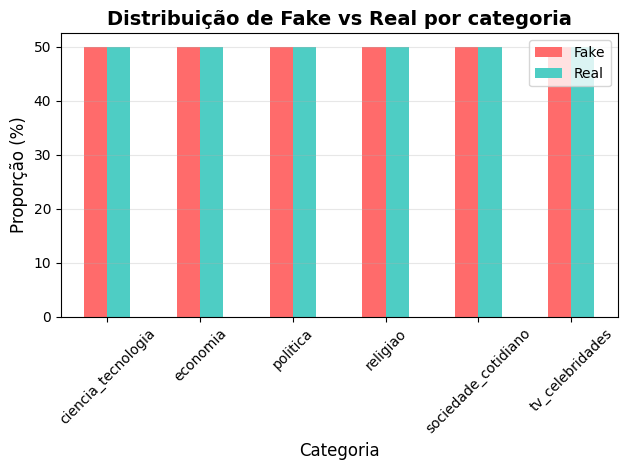

In [ ]:
print("Tabela Cruzada: Categoria vs Label")
print("="*50)

tabela_cruzada = pd.crosstab(df['categoria'], df['label_texto'])
print(tabela_cruzada)

print("\n Proporções por categoria (%):")
proporcoes = pd.crosstab(df['categoria'], df['label_texto'], normalize='index') * 100
print(proporcoes.round(2))

print("Visualização do Viés por Categoria")
print("="*50)

plt.figure(figsize=(12,6))

proporcoes.plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title("Distribuição de Fake vs Real por categoria", fontsize=14, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.legend(['Fake','Real'])
plt.xticks(rotation=45) #Roda os nomes das categorias para caber melhor
plt.grid(axis='y', alpha=0.3) #Adiciona linhas de grade horizontais
plt.tight_layout()
plt.show()



## 3. Calcular métricas de fairness por categoria
SPD mede se diferentes grupos (categorias) têm a mesma probabilidade de receber um resultado positivo.
DI mede a razão entre as taxas de resultados positivos de diferentes grupos. É uma métrica multiplicativa (ao contrário do SPD que é aditivo).

In [34]:
# Calcular métricas de fairness por categoria
print("Métricas de Fairness por Categoria")
print("="*60)

# Calcular Statistical Parity Difference (SPD) para cada categoria
print("Statistical Parity Difference (SPD):")
print("SPD = P(Y=1|categoria) - P(Y=1|geral)")
print("Valores próximos de 0 = justo, valores distantes = viés")
print("-" * 40)

# Taxa geral de fake news (baseline)
taxa_geral_fake = (df['label_texto'] == 'fake').mean()
print(f"Taxa geral de fake news: {taxa_geral_fake:.3f} ({taxa_geral_fake*100:.1f}%)")

print("\nSPD por categoria:")
spd_resultados = {}

for categoria in df['categoria'].unique():
    # Filtrar dados da categoria
    dados_categoria = df[df['categoria'] == categoria]
    
    # Taxa de fake news nesta categoria
    taxa_categoria_fake = (dados_categoria['label_texto'] == 'fake').mean()
    
    # Calcular SPD
    spd = taxa_categoria_fake - taxa_geral_fake
    spd_resultados[categoria] = spd
    
    # Status do viés
    if abs(spd) < 0.1:
        status = "Justo"
    elif abs(spd) < 0.2:
        status = "Viés Moderado"
    else:
        status = "Viés Alto"
    
    print(f"{categoria:15}: SPD = {spd:+.3f} ({taxa_categoria_fake*100:5.1f}% fake) - {status}")
    
    

print("\n" + "="*60)
print("Disparate Impact (DI):")
print("DI = P(Y=1|categoria) / P(Y=1|geral)")
print("Valores próximos de 1.0 = justo, distantes = viés")
print("-" * 40)

print("\nDI por categoria:")
di_resultados = {}

for categoria in df['categoria'].unique():
    # Filtrar dados da categoria
    dados_categoria = df[df['categoria'] == categoria]
    
    # Taxa de fake news nesta categoria
    taxa_categoria_fake = (dados_categoria['label_texto'] == 'fake').mean()
    
    # Calcular DI (evitar divisão por zero)
    if taxa_geral_fake > 0:
        di = taxa_categoria_fake / taxa_geral_fake
    else:
        di = float('inf')
    
    di_resultados[categoria] = di
    
    # Status do viés (regra 80/20)
    if 0.8 <= di <= 1.25:
        status = "Justo"
    elif 0.5 <= di < 0.8 or 1.25 < di <= 2.0:
        status = "Viés Moderado"
    else:
        status = "Viés Alto"
    
    print(f"{categoria:15}: DI = {di:.2f} ({taxa_categoria_fake*100:5.1f}% fake) - {status}")

Métricas de Fairness por Categoria
Statistical Parity Difference (SPD):
SPD = P(Y=1|categoria) - P(Y=1|geral)
Valores próximos de 0 = justo, valores distantes = viés
----------------------------------------
Taxa geral de fake news: 0.500 (50.0%)

SPD por categoria:
politica       : SPD = +0.000 ( 50.0% fake) - Justo
tv_celebridades: SPD = +0.000 ( 50.0% fake) - Justo
sociedade_cotidiano: SPD = +0.000 ( 50.0% fake) - Justo
ciencia_tecnologia: SPD = +0.000 ( 50.0% fake) - Justo
economia       : SPD = +0.000 ( 50.0% fake) - Justo
religiao       : SPD = +0.000 ( 50.0% fake) - Justo

Disparate Impact (DI):
DI = P(Y=1|categoria) / P(Y=1|geral)
Valores próximos de 1.0 = justo, distantes = viés
----------------------------------------

DI por categoria:
politica       : DI = 1.00 ( 50.0% fake) - Justo
tv_celebridades: DI = 1.00 ( 50.0% fake) - Justo
sociedade_cotidiano: DI = 1.00 ( 50.0% fake) - Justo
ciencia_tecnologia: DI = 1.00 ( 50.0% fake) - Justo
economia       : DI = 1.00 ( 50.0% fake) 